In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_csv("insurance.csv")
df.head()

,birth_date,gender,bmi,child,smoking,region,insurance_price
0,2002,female,27.9,0,yes,southwest,16884.92
1,2003,male,33.8,1,no,southeast,1725.55
2,1993,male,33.0,3,no,southeast,4449.46
3,1988,male,22.7,0,no,northwest,21984.47
4,1989,male,28.9,0,no,northwest,3866.86


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
birth_date         1338 non-null int64
gender             1337 non-null object
bmi                1336 non-null float64
child              1338 non-null int64
smoking            1338 non-null object
region             1338 non-null object
insurance_price    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [95]:
df.isnull().sum()

birth_date         0
gender             1
bmi                2
child              0
smoking            0
region             0
insurance_price    0
dtype: int64

In [96]:
df.describe()

,birth_date,bmi,child,insurance_price
count,1338.000000,1336.000000,1338.000000,1338.000000
mean,1981.792975,30.680539,1.094918,13270.422414
std,14.049960,6.089223,1.205493,12110.011240
min,1957.000000,16.000000,0.000000,1121.870000
25%,1970.000000,26.300000,0.000000,4740.287500
50%,1982.000000,30.400000,1.000000,9382.030000
75%,1994.000000,34.700000,2.000000,16639.915000
max,2003.000000,53.100000,5.000000,63770.430000


In [97]:
df["age"] = 2021 - df["birth_date"]
df.head()

,birth_date,gender,bmi,child,smoking,region,insurance_price,age
0,2002,female,27.9,0,yes,southwest,16884.92,19
1,2003,male,33.8,1,no,southeast,1725.55,18
2,1993,male,33.0,3,no,southeast,4449.46,28
3,1988,male,22.7,0,no,northwest,21984.47,33
4,1989,male,28.9,0,no,northwest,3866.86,32


In [98]:
df.drop("birth_date", axis=1, inplace=True)
df.head()

,gender,bmi,child,smoking,region,insurance_price,age
0,female,27.9,0,yes,southwest,16884.92,19
1,male,33.8,1,no,southeast,1725.55,18
2,male,33.0,3,no,southeast,4449.46,28
3,male,22.7,0,no,northwest,21984.47,33
4,male,28.9,0,no,northwest,3866.86,32


In [99]:
df["gender"].value_counts(dropna=False)

male      675
female    662
NaN         1
Name: gender, dtype: int64

In [100]:
df[df["gender"].isnull()]

,gender,bmi,child,smoking,region,insurance_price,age
73,NaN,32.0,1,no,southeast,11946.63,58


In [101]:
df[(df["age"] > 55 ) & (df["age"] < 60 )]["gender"].value_counts()

female    52
male      49
Name: gender, dtype: int64

In [102]:
df.loc[df[df["gender"].isnull()].index, "gender"] = "male"

In [103]:
df["gender"].isnull().sum()

0

In [104]:
df.loc[73]

gender                  male
bmi                       32
child                      1
smoking                   no
region             southeast
insurance_price      11946.6
age                       58
Name: 73, dtype: object

In [105]:
df.isnull().sum()

gender             0
bmi                2
child              0
smoking            0
region             0
insurance_price    0
age                0
dtype: int64

In [106]:
df.groupby("smoking")["bmi"].describe()

,count,mean,std,min,25%,50%,75%,max
smoking,,,,,,,,
no,1062.0,30.672128,6.031057,16.0,26.3,30.40,34.4,53.1
yes,274.0,30.713139,6.320840,17.2,26.1,30.45,35.2,52.6


In [107]:
df[df["bmi"].isnull()]

,gender,bmi,child,smoking,region,insurance_price,age
17,male,NaN,0,no,northeast,2395.17,23
28,male,NaN,1,no,northwest,2775.19,23


In [108]:
df[(df["age"]==23) & (df["smoking"]=="no") & (df["gender"]=="male")]["bmi"].sort_values()

1027    18.7
1114    24.5
804     26.5
881     27.4
479     32.6
1092    32.7
12      34.4
761     35.2
817     37.1
358     41.9
847     50.4
17       NaN
28       NaN
Name: bmi, dtype: float64

In [109]:
df[(df["age"]==23) & (df["smoking"]=="no") & (df["gender"]=="male")]["bmi"].describe()

count    11.000000
mean     32.854545
std       8.694523
min      18.700000
25%      26.950000
50%      32.700000
75%      36.150000
max      50.400000
Name: bmi, dtype: float64

In [110]:
mean = df[(df["age"]==23) & (df["smoking"]=="no") & (df["gender"]=="male")]["bmi"].mean()
mean

32.85454545454545

In [111]:
df["bmi"].fillna(mean, inplace=True)

In [112]:
df.loc[17]

gender                  male
bmi                  32.8545
child                      0
smoking                   no
region             northeast
insurance_price      2395.17
age                       23
Name: 17, dtype: object

In [113]:
df.isnull().sum()

gender             0
bmi                0
child              0
smoking            0
region             0
insurance_price    0
age                0
dtype: int64

In [114]:
df[["smoking", "gender", "region"]].describe()

,smoking,gender,region
count,1338,1338,1338
unique,2,2,4
top,no,male,southeast
freq,1064,676,364


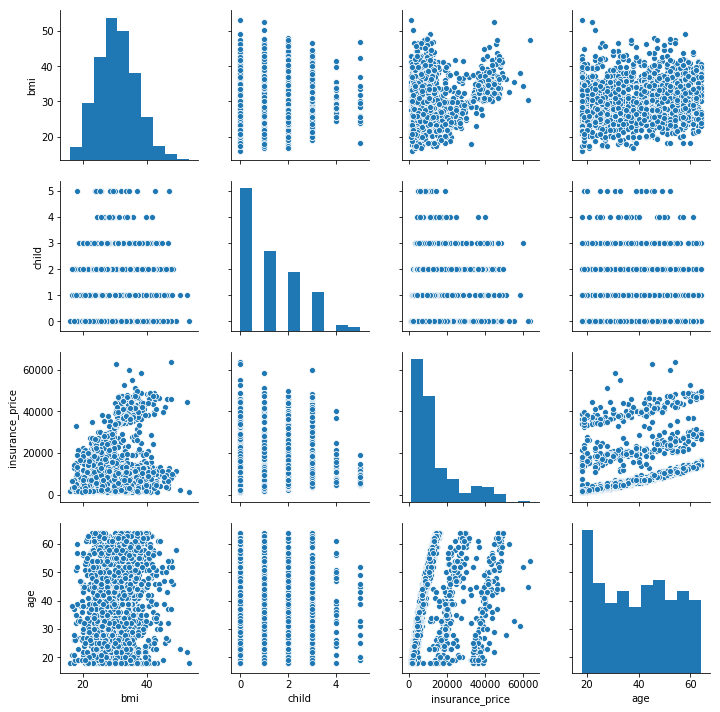

In [115]:
sns.pairplot(df)

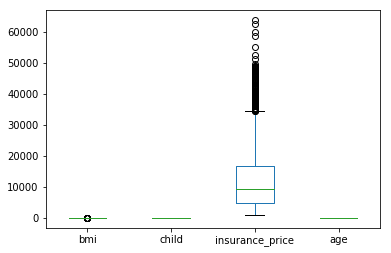

In [116]:
df.plot(kind="box")

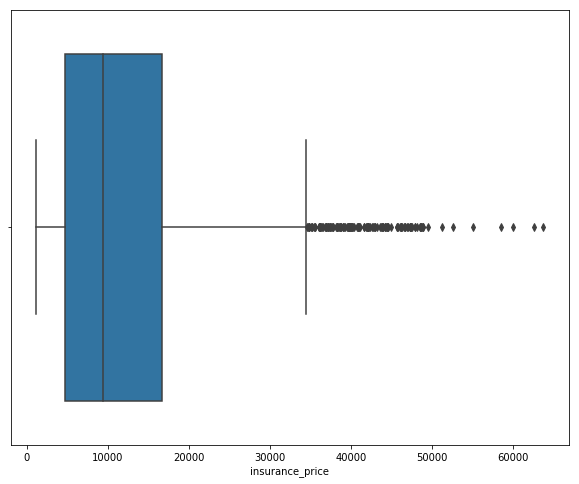

In [117]:
plt.figure(figsize=(10,8))
sns.boxplot(df["insurance_price"])

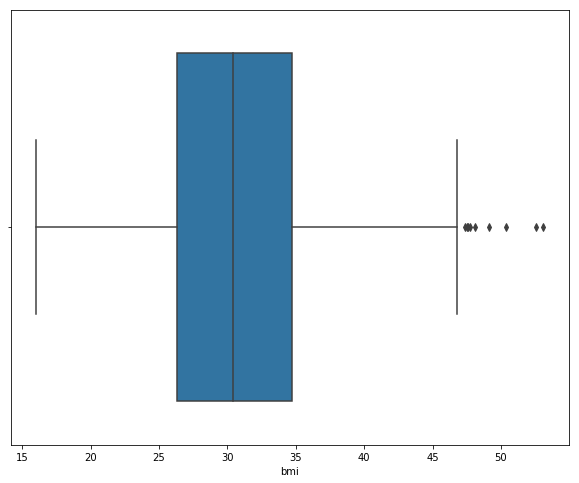

In [118]:
plt.figure(figsize=(10,8))
sns.boxplot(df["bmi"])

In [119]:
df["bmi"].describe()

count    1338.000000
mean       30.683789
std         6.085247
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

In [120]:
q1 = df["bmi"].quantile(.25)
q1

26.3

In [121]:
q3 = df["bmi"].quantile(.75)
q3

34.7

In [122]:
iqr = q3 - q1
iqr

8.400000000000002

In [123]:
ub = df["bmi"].quantile(.75) + 1.5 * iqr
ub

47.300000000000004

In [124]:
lb = df["bmi"].quantile(.25)+ 1.5 * iqr
lb

38.900000000000006

In [125]:
df[df["bmi"] > ub]

,gender,bmi,child,smoking,region,insurance_price,age
116,male,49.1,0,no,southeast,11381.33,58
286,female,48.1,2,no,northeast,9432.93,46
401,male,47.5,1,no,southeast,8083.92,47
543,female,47.4,0,yes,southeast,63770.43,54
847,male,50.4,1,no,southeast,2438.06,23
860,female,47.6,2,yes,southwest,46113.51,37
1047,male,52.6,1,yes,southeast,44501.40,22
1088,male,47.7,1,no,southeast,9748.91,52
1317,male,53.1,0,no,southeast,1163.46,18


In [126]:
df[(df["bmi"] > ub) & (df["smoking"]=="no")]

,gender,bmi,child,smoking,region,insurance_price,age
116,male,49.1,0,no,southeast,11381.33,58
286,female,48.1,2,no,northeast,9432.93,46
401,male,47.5,1,no,southeast,8083.92,47
847,male,50.4,1,no,southeast,2438.06,23
1088,male,47.7,1,no,southeast,9748.91,52
1317,male,53.1,0,no,southeast,1163.46,18


In [127]:
df[(df["bmi"] > 50) & (df["smoking"]=="no")]

,gender,bmi,child,smoking,region,insurance_price,age
847,male,50.4,1,no,southeast,2438.06,23
1317,male,53.1,0,no,southeast,1163.46,18


In [128]:
df.drop(df[(df["bmi"] > 50) & (df["smoking"]=="no")].index, inplace=True)

In [129]:
# df.loc[847] #if we try to do this we will get an error.

In [130]:
# now we should reset index
df.reset_index().tail()

,index,gender,bmi,child,smoking,region,insurance_price,age
1331,1333,male,31.0,3,no,northwest,10600.55,50
1332,1334,female,31.9,0,no,northeast,2205.98,18
1333,1335,female,36.9,0,no,southeast,1629.83,18
1334,1336,female,25.8,0,no,southwest,2007.95,21
1335,1337,female,29.1,0,yes,northwest,29141.36,61


In [131]:
# to drop the index column above we should use the following
df.reset_index(drop=True).tail()

,gender,bmi,child,smoking,region,insurance_price,age
1331,male,31.0,3,no,northwest,10600.55,50
1332,female,31.9,0,no,northeast,2205.98,18
1333,female,36.9,0,no,southeast,1629.83,18
1334,female,25.8,0,no,southwest,2007.95,21
1335,female,29.1,0,yes,northwest,29141.36,61


In [132]:
df.reset_index(drop=True, inplace=True)

In [133]:
from scipy.stats.mstats import winsorize

In [134]:
df["bmi"].quantile(0.99)

46.030000000000015

In [135]:
df["bmi"].quantile(0)

16.0

In [136]:
winsorize(df["bmi"], (0, 0.01))

masked_array(data=[27.9, 33.8, 33. , ..., 36.9, 25.8, 29.1],
             mask=False,
       fill_value=1e+20)

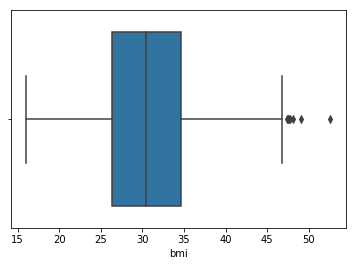

In [137]:
sns.boxplot(df["bmi"])

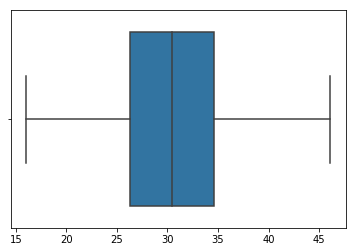

In [138]:
sns.boxplot(x=pd.Series(winsorize(df["bmi"], (0, 0.01))))

In [139]:
pd.Series(winsorize(df["bmi"], (0, 0.01)))

0       27.900000
1       33.800000
2       33.000000
3       22.700000
4       28.900000
5       25.700000
6       33.400000
7       27.700000
8       29.800000
9       25.800000
10      26.200000
11      26.300000
12      34.400000
13      39.800000
14      42.100000
15      24.600000
16      30.800000
17      32.854545
18      40.300000
19      35.300000
20      36.000000
21      32.400000
22      34.100000
23      31.900000
24      28.000000
25      27.700000
26      23.100000
27      32.800000
28      32.854545
29      36.300000
          ...    
1306    28.100000
1307    30.200000
1308    32.200000
1309    26.300000
1310    26.700000
1311    42.900000
1312    34.700000
1313    23.700000
1314    28.300000
1315    20.600000
1316    39.700000
1317    26.300000
1318    31.100000
1319    26.700000
1320    38.800000
1321    40.400000
1322    25.900000
1323    33.500000
1324    32.900000
1325    30.000000
1326    24.200000
1327    38.600000
1328    25.700000
1329    33.400000
1330    44

In [140]:
pd.Series(winsorize(df["bmi"], (0, 0.01))).sort_values(ascending=False)

549     46.1
438     46.1
940     46.1
929     46.1
1046    46.1
660     46.1
547     46.1
1087    46.1
286     46.1
543     46.1
401     46.1
116     46.1
859     46.1
454     46.1
1130    45.9
292     45.5
582     45.4
1023    45.3
1155    44.9
563     44.8
701     44.7
1330    44.7
521     44.2
796     44.2
894     44.0
356     43.9
674     43.9
866     43.7
493     43.4
383     43.3
        ... 
266     19.8
591     19.6
769     19.5
99      19.3
1003    19.2
1099    19.1
613     19.0
169     18.9
1026    18.7
1128    18.6
684     18.5
1132    18.3
1073    18.3
949     18.3
1084    18.3
198     18.1
380     18.0
1204    17.9
232     17.8
128     17.8
821     17.7
410     17.5
680     17.4
1028    17.3
250     17.3
1285    17.3
412     17.2
1225    16.8
428     16.8
172     16.0
Length: 1336, dtype: float64

In [141]:
df["bmi"] = pd.Series(winsorize(df["bmi"], (0, 0.01)))

In [142]:
df.sort_values(by="bmi", ascending=False)

,gender,bmi,child,smoking,region,insurance_price,age
116,male,46.1,0,no,southeast,11381.33,58
929,male,46.1,1,no,southeast,2927.06,26
547,female,46.1,2,no,southwest,11538.42,54
660,male,46.1,3,no,southeast,6435.62,37
549,female,46.1,0,yes,southeast,45863.21,43
940,female,46.1,1,no,southeast,9549.57,50
438,female,46.1,5,no,southeast,12592.53,52
543,female,46.1,0,yes,southeast,63770.43,54
454,male,46.1,2,no,southeast,4686.39,32
401,male,46.1,1,no,southeast,8083.92,47


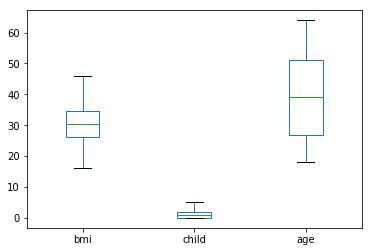

In [143]:
df.drop("insurance_price", axis=1).plot(kind="box")

### Visualization

In [144]:
df.groupby("smoking").mean()

,bmi,child,insurance_price,age
smoking,,,,
no,30.626656,1.091337,8446.760932,39.420904
yes,30.678832,1.113139,32050.231971,38.514599


In [145]:
df.groupby("gender").mean()

,bmi,child,insurance_price,age
gender,,,,
female,30.370393,1.074018,12569.578897,39.503021
male,30.899568,1.117211,13992.822611,38.971810


In [146]:
df.groupby("region").mean()

,bmi,child,insurance_price,age
region,,,,
northeast,29.198008,1.046296,13406.384691,39.268519
northwest,29.249399,1.147692,12417.575169,39.196923
southeast,33.214088,1.052486,14806.873702,39.041436
southwest,30.590154,1.141538,12346.937908,39.455385


In [147]:
df.groupby("smoking").describe().T

smoking                          no           yes
bmi             count   1062.000000    274.000000
                mean      30.626656     30.678832
                std        5.934351      6.222780
                min       16.000000     17.200000
                25%       26.300000     26.100000
                50%       30.400000     30.450000
                75%       34.400000     35.200000
                max       46.100000     46.100000
child           count   1062.000000    274.000000
                mean       1.091337      1.113139
                std        1.218820      1.157066
                min        0.000000      0.000000
                25%        0.000000      0.000000
                50%        1.000000      1.000000
                75%        2.000000      2.000000
                max        5.000000      5.000000
insurance_price count   1062.000000    274.000000
                mean    8446.760932  32050.231971
                std     5992.434460  11541.547338
                min     1121.870000  12829.460000
                25%     3990.925000  20826.245000
                50%     7346.935000  34456.350000
                75%    11363.150000  41019.205000
                max    36910.610000  63770.430000
age             count   1062.000000    274.000000
                mean      39.420904     38.514599
                std       14.072348     13.923186
                min       18.000000     18.000000
                25%       27.000000     27.000000
                50%       40.000000     38.000000
                75%       52.000000     49.000000
                max       64.000000     64.000000

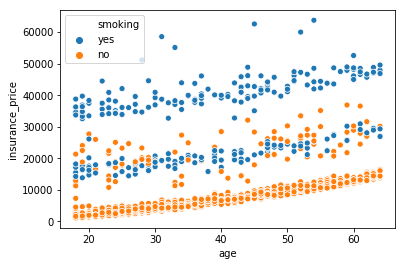

In [148]:
sns.scatterplot("age", "insurance_price", data=df, hue="smoking")

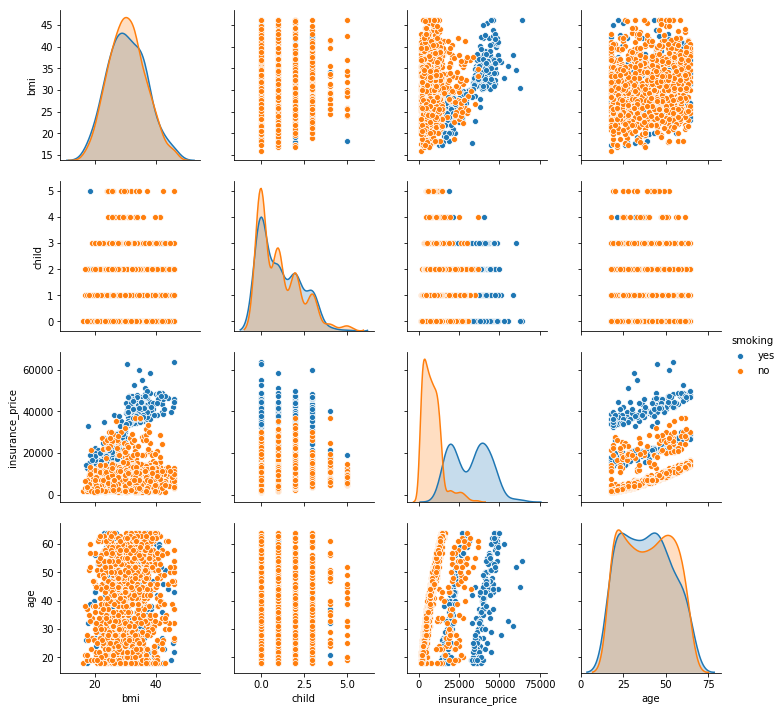

In [149]:
sns.pairplot(df, hue="smoking")

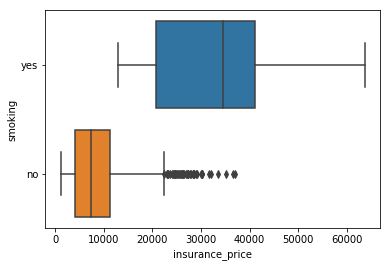

In [150]:
sns.boxplot(x="insurance_price", y="smoking", data=df)

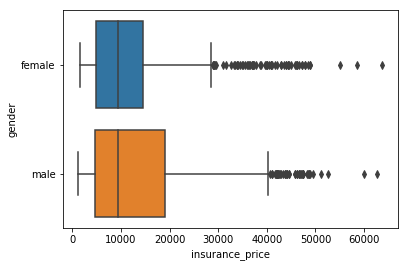

In [151]:
sns.boxplot(x="insurance_price", y="gender", data= df)

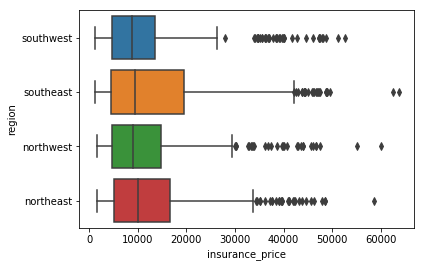

In [152]:
sns.boxplot(x="insurance_price", y="region", data=df)

In [153]:
df["region"].value_counts()

southeast    362
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

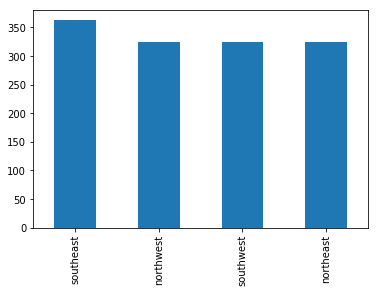

In [154]:
df["region"].value_counts().plot(kind="bar")

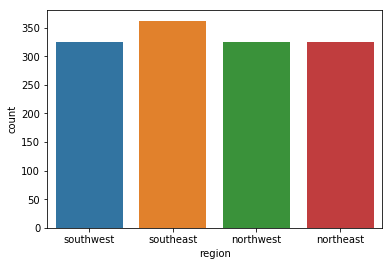

In [155]:
sns.countplot(df["region"])

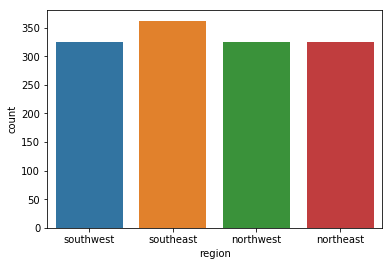

In [156]:
#sns.set(style="darkgrid")
# titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="region", data=df)

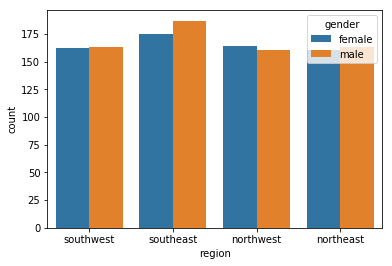

In [157]:
ax = sns.countplot(x="region", hue="gender", data=df)

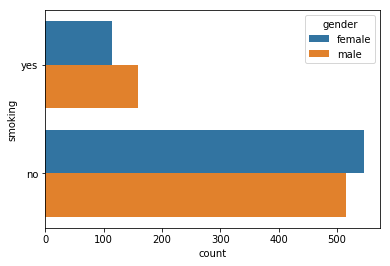

In [158]:
ax = sns.countplot(y="smoking", hue="gender", data=df)

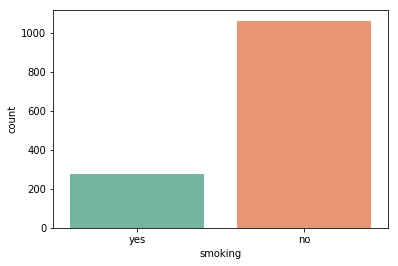

In [159]:
# Use a different color palette:

ax = sns.countplot(x="smoking", data=df, palette="Set2")

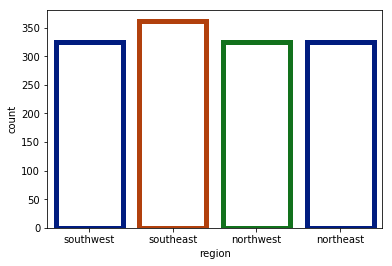

In [160]:
#Use ``plt.bar`` keyword arguments for a different look:

ax = sns.countplot(x="region", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

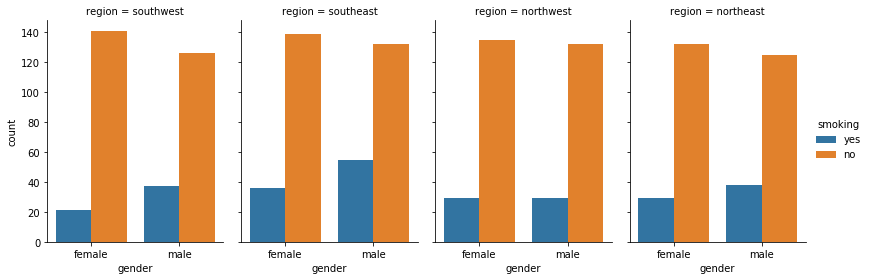

In [161]:
g = sns.catplot(x="gender", hue="smoking", col="region",
                data=df, kind="count",
                height=4, aspect=.7);

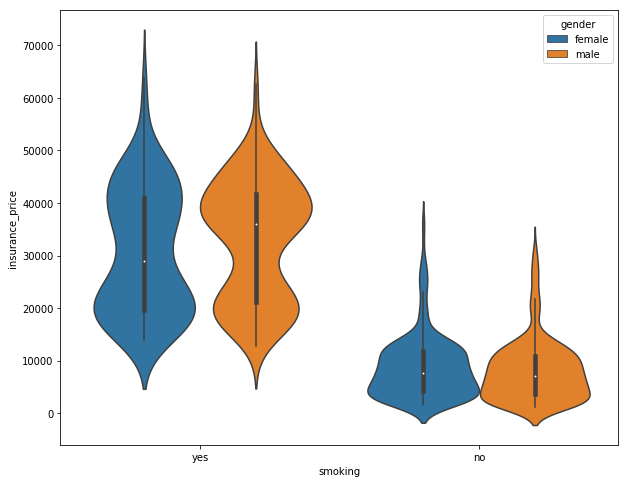

In [162]:
plt.figure(figsize=(10,8))
sns.violinplot(x="smoking", y= "insurance_price", hue="gender", data=df)

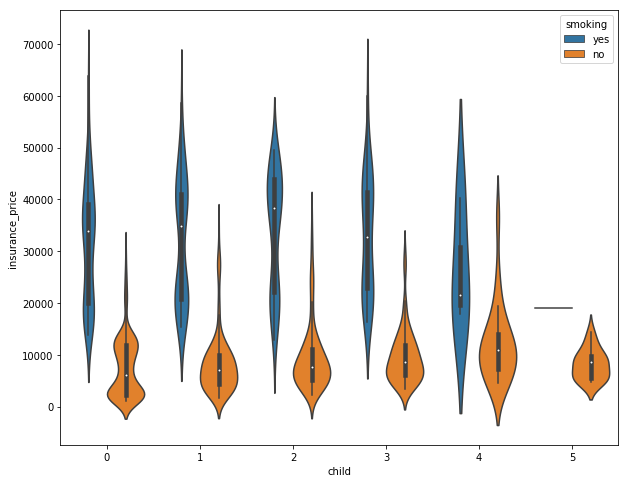

In [163]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='child', y='insurance_price', hue='smoking', data=df)

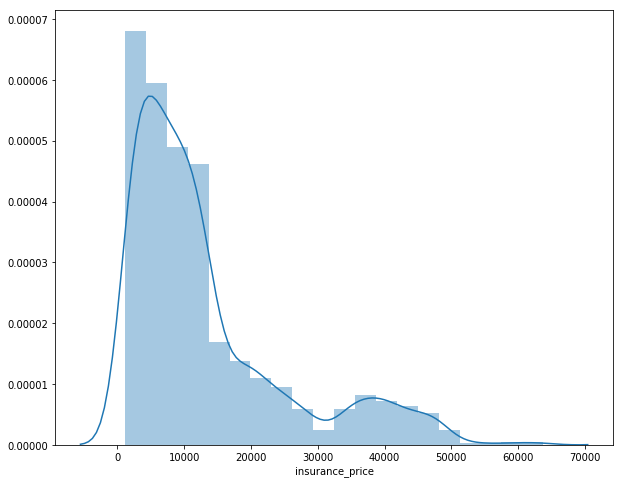

In [164]:
plt.figure(figsize=(10,8))
sns.distplot(df["insurance_price"], bins=20)

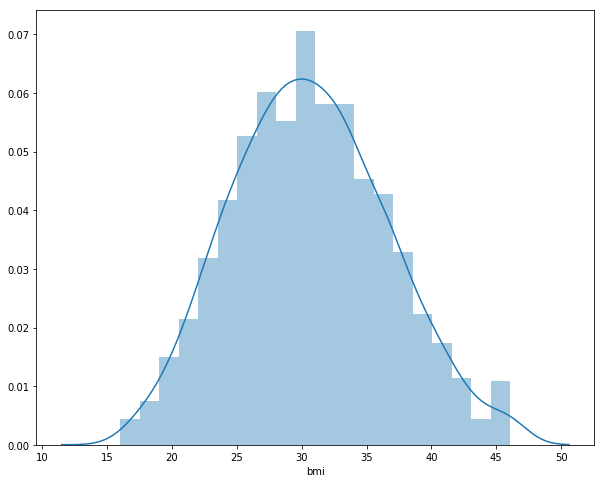

In [165]:
plt.figure(figsize=(10,8))
sns.distplot(df["bmi"], bins=20)

### Feature Engineering

In [167]:
pd.cut(x=df["bmi"],bins=[0,18.5,24.9,29.9,35,99], labels=["Underweight", "Normal", "Overweight", "Obese1", "Obese2"])

0       Overweight
1           Obese1
2           Obese1
3           Normal
4       Overweight
5       Overweight
6           Obese1
7       Overweight
8       Overweight
9       Overweight
10      Overweight
11      Overweight
12          Obese1
13          Obese2
14          Obese2
15          Normal
16          Obese1
17          Obese1
18          Obese2
19          Obese2
20          Obese2
21          Obese1
22          Obese1
23          Obese1
24      Overweight
25      Overweight
26          Normal
27          Obese1
28          Obese1
29          Obese2
           ...    
1306    Overweight
1307        Obese1
1308        Obese1
1309    Overweight
1310    Overweight
1311        Obese2
1312        Obese1
1313        Normal
1314    Overweight
1315        Normal
1316        Obese2
1317    Overweight
1318        Obese1
1319    Overweight
1320        Obese2
1321        Obese2
1322    Overweight
1323        Obese1
1324        Obese1
1325        Obese1
1326        Normal
1327        

In [168]:
df.groupby(pd.cut(x=df["bmi"],bins=[0,18.5,24.9,29.9,35,99],
                  labels=["Underweight", "Normal", "Overweight", "Obese1", "Obese2"])).mean()

,bmi,child,insurance_price,age
bmi,,,,
Underweight,17.630000,1.050000,8951.743000,32.850000
Normal,22.600455,1.122727,10441.308000,36.827273
Overweight,27.581491,1.064267,11000.079306,38.897172
Obese1,32.343789,1.145038,14359.448753,39.295165
Obese2,38.746815,1.057325,17050.340255,41.671975


### Encoding

In [169]:
pd.get_dummies(df)

,bmi,child,insurance_price,age,gender_female,gender_male,smoking_no,smoking_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,27.900000,0,16884.92,19,1,0,0,1,0,0,0,1
1,33.800000,1,1725.55,18,0,1,1,0,0,0,1,0
2,33.000000,3,4449.46,28,0,1,1,0,0,0,1,0
3,22.700000,0,21984.47,33,0,1,1,0,0,1,0,0
4,28.900000,0,3866.86,32,0,1,1,0,0,1,0,0
5,25.700000,0,3756.62,31,1,0,1,0,0,0,1,0
6,33.400000,1,8240.59,46,1,0,1,0,0,0,1,0
7,27.700000,3,7281.51,37,1,0,1,0,0,1,0,0
8,29.800000,2,6406.41,37,0,1,1,0,1,0,0,0
9,25.800000,0,28923.14,60,1,0,1,0,0,1,0,0


In [170]:
pd.get_dummies(df, drop_first=True)

,bmi,child,insurance_price,age,gender_male,smoking_yes,region_northwest,region_southeast,region_southwest
0,27.900000,0,16884.92,19,0,1,0,0,1
1,33.800000,1,1725.55,18,1,0,0,1,0
2,33.000000,3,4449.46,28,1,0,0,1,0
3,22.700000,0,21984.47,33,1,0,1,0,0
4,28.900000,0,3866.86,32,1,0,1,0,0
5,25.700000,0,3756.62,31,0,0,0,1,0
6,33.400000,1,8240.59,46,0,0,0,1,0
7,27.700000,3,7281.51,37,0,0,1,0,0
8,29.800000,2,6406.41,37,1,0,0,0,0
9,25.800000,0,28923.14,60,0,0,1,0,0


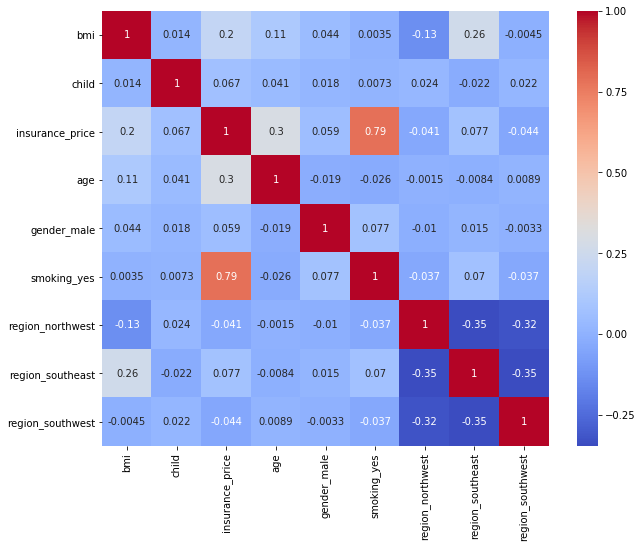

In [171]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.get_dummies(df, drop_first=True).corr(), annot=True, cmap="coolwarm")

In [172]:
df = pd.get_dummies(df, drop_first=True)

In [173]:
df

,bmi,child,insurance_price,age,gender_male,smoking_yes,region_northwest,region_southeast,region_southwest
0,27.900000,0,16884.92,19,0,1,0,0,1
1,33.800000,1,1725.55,18,1,0,0,1,0
2,33.000000,3,4449.46,28,1,0,0,1,0
3,22.700000,0,21984.47,33,1,0,1,0,0
4,28.900000,0,3866.86,32,1,0,1,0,0
5,25.700000,0,3756.62,31,0,0,0,1,0
6,33.400000,1,8240.59,46,0,0,0,1,0
7,27.700000,3,7281.51,37,0,0,1,0,0
8,29.800000,2,6406.41,37,1,0,0,0,0
9,25.800000,0,28923.14,60,0,0,1,0,0


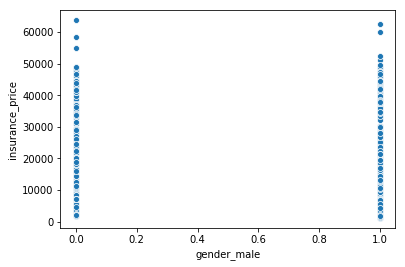

In [174]:
sns.scatterplot("gender_male", "insurance_price", data=df)

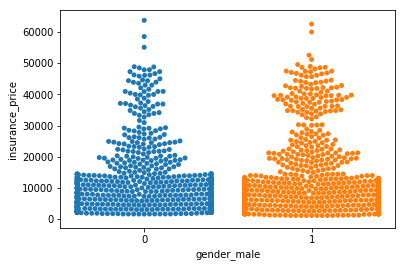

In [175]:
sns.swarmplot("gender_male", "insurance_price", data=df)